In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_theme(style="whitegrid")  

In [6]:
root_path = "/home/basia/Desktop/cross-adaptation/experiments/data/tabular/processed"
datasets = os.listdir(os.path.join(root_path, 'train'))
data = {
        dataset[:-4]: pd.concat([
            pd.read_csv(os.path.join(root_path, 'train', dataset), index_col=0),
            pd.read_csv(os.path.join(root_path, 'test', dataset), index_col=0)
        ], ignore_index=True)
        for dataset in datasets 
    }
del data["brazilv2"]
del data["brazil"]
del data["brazil_3"]
del data["italy"]



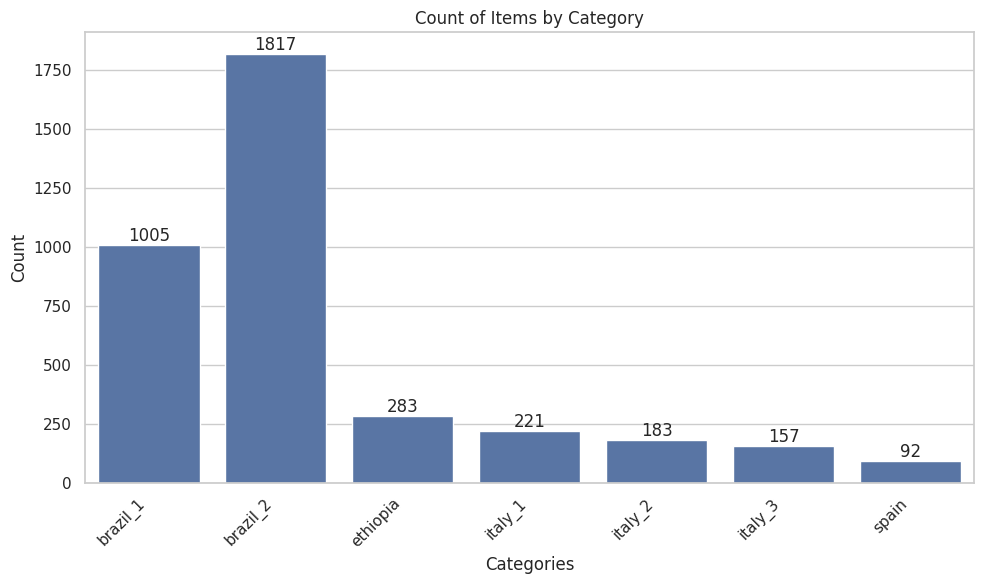

In [7]:
# Create the counts dictionary and sort it alphabetically
counts = {k: len(v.index) for k, v in data.items()}
counts = dict(sorted(counts.items()))  # Sort by keys alphabetically

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=list(counts.keys()), y=list(counts.values()))

# Customize the plot
plt.title('Count of Items by Category')
plt.xlabel('Categories')
plt.ylabel('Count')

# Rotate x-axis labels if needed
plt.xticks(rotation=45, ha='right')

# Add value labels on top of each bar
for i, v in enumerate(counts.values()):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

In [8]:
for k, v in data.items():
    print(f"Missing values in {k}: {v.isnull().sum()}")

    # For percentage of missing values
    print("\nPercentage of missing values:")
    print(v.isnull().sum() / len(v) * 100)

Missing values in italy_2: HCT       0
HGB       0
MCH       0
MCHC      0
MCV       0
RBC       0
WBC       0
PLT       0
NE        0
LY        0
MO        0
EO        0
BA        0
target    0
dtype: int64

Percentage of missing values:
HCT       0.0
HGB       0.0
MCH       0.0
MCHC      0.0
MCV       0.0
RBC       0.0
WBC       0.0
PLT       0.0
NE        0.0
LY        0.0
MO        0.0
EO        0.0
BA        0.0
target    0.0
dtype: float64
Missing values in spain: HCT       0
HGB       0
MCH       0
MCHC      0
MCV       0
RBC       0
WBC       0
PLT       0
NE        0
LY        0
MO        0
EO        0
BA        0
target    0
dtype: int64

Percentage of missing values:
HCT       0.0
HGB       0.0
MCH       0.0
MCHC      0.0
MCV       0.0
RBC       0.0
WBC       0.0
PLT       0.0
NE        0.0
LY        0.0
MO        0.0
EO        0.0
BA        0.0
target    0.0
dtype: float64
Missing values in italy_3: HCT       0
HGB       0
MCH       0
MCHC      0
MCV       0
RBC       0
WBC

In [9]:
for k, v in data.items():
    print(f"Missing values in {k}: {v.isnull().sum()}")

    # For percentage of missing values
    print("\nPercentage of missing values:")
    print(v.isnull().sum() / len(v) * 100)

Missing values in italy_2: HCT       0
HGB       0
MCH       0
MCHC      0
MCV       0
RBC       0
WBC       0
PLT       0
NE        0
LY        0
MO        0
EO        0
BA        0
target    0
dtype: int64

Percentage of missing values:
HCT       0.0
HGB       0.0
MCH       0.0
MCHC      0.0
MCV       0.0
RBC       0.0
WBC       0.0
PLT       0.0
NE        0.0
LY        0.0
MO        0.0
EO        0.0
BA        0.0
target    0.0
dtype: float64
Missing values in spain: HCT       0
HGB       0
MCH       0
MCHC      0
MCV       0
RBC       0
WBC       0
PLT       0
NE        0
LY        0
MO        0
EO        0
BA        0
target    0
dtype: int64

Percentage of missing values:
HCT       0.0
HGB       0.0
MCH       0.0
MCHC      0.0
MCV       0.0
RBC       0.0
WBC       0.0
PLT       0.0
NE        0.0
LY        0.0
MO        0.0
EO        0.0
BA        0.0
target    0.0
dtype: float64
Missing values in italy_3: HCT       0
HGB       0
MCH       0
MCHC      0
MCV       0
RBC       0
WBC

italy_2 target
1    96
0    87
Name: count, dtype: int64
italy_2 target
1    96
0    87
Name: count, dtype: int64
spain target
1    67
0    25
Name: count, dtype: int64
spain target
1    67
0    25
Name: count, dtype: int64
italy_3 target
1    94
0    63
Name: count, dtype: int64
italy_3 target
1    94
0    63
Name: count, dtype: int64
brazil_2 target
0    1532
1     285
Name: count, dtype: int64
brazil_2 target
0    1532
1     285
Name: count, dtype: int64
ethiopia target
0    162
1    121
Name: count, dtype: int64
ethiopia target
0    162
1    121
Name: count, dtype: int64
italy_1 target
1    134
0     87
Name: count, dtype: int64
italy_1 target
1    134
0     87
Name: count, dtype: int64
brazil_1 target
0    729
1    276
Name: count, dtype: int64
brazil_1 target
0    729
1    276
Name: count, dtype: int64


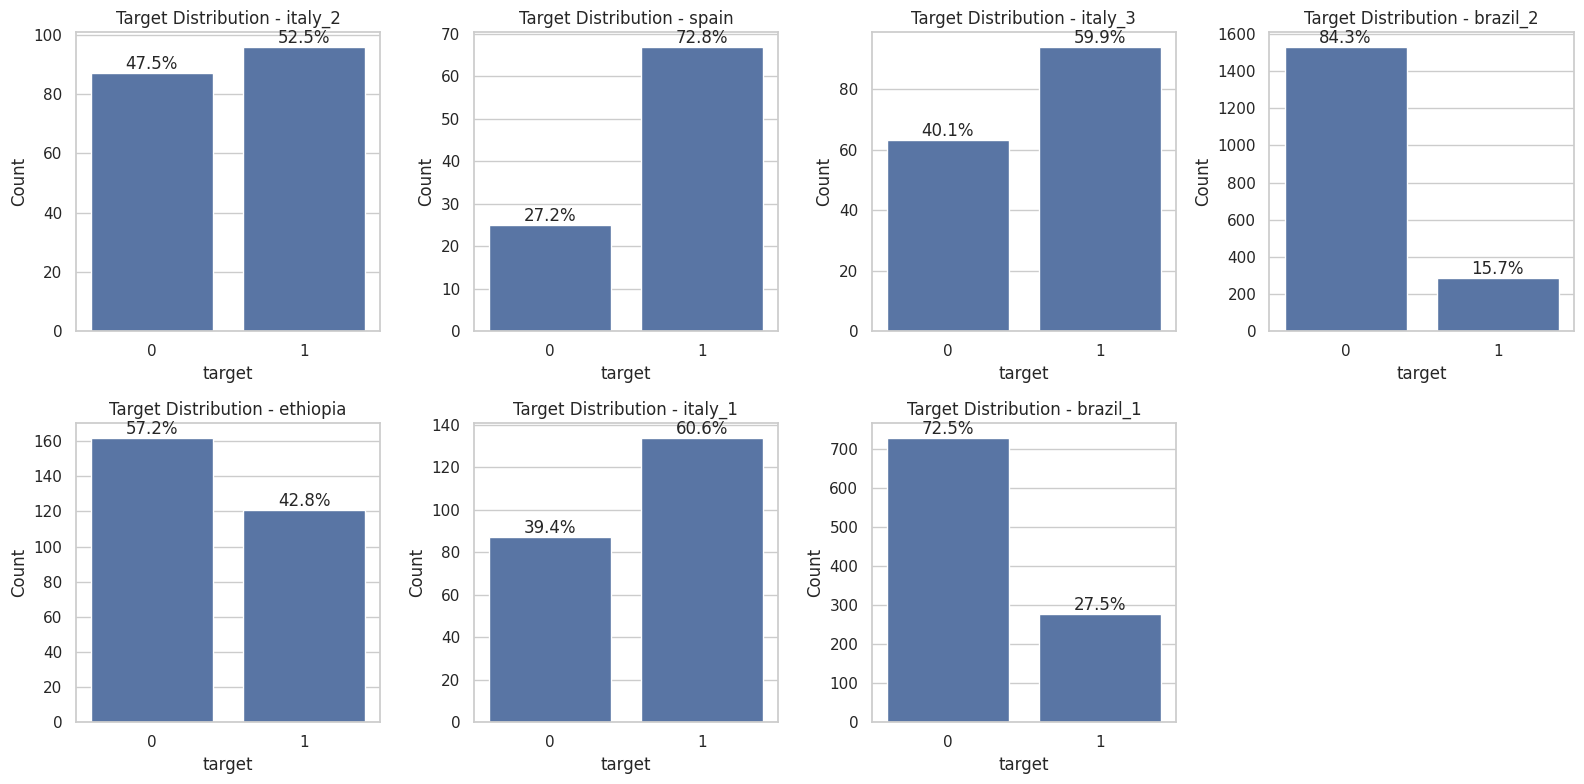

In [10]:
num_cols = (len(data) + 1) // 2  # Calculate number of columns needed
fig, axes = plt.subplots(2, num_cols, figsize=(4*num_cols, 8))
axes = axes.flatten()  # Flatten 2D array to 1D for easier iteration

# Hide extra subplots if odd number of datasets
if len(data) % 2 != 0:
    axes[-1].set_visible(False)

for ax, (name, df) in zip(axes, data.items()):
    sns.countplot(data=df, x="target", ax=ax)
    ax.set_title(f'Target Distribution - {name}')
    ax.set_ylabel('Count')
    
    # Add percentage labels on top of bars
    total = len(df)
    for p in ax.patches:
        percentage = f'{100 * p.get_height() / total:.1f}%'
        ax.annotate(percentage,
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='bottom')
        print(name, df.target.value_counts())
    

plt.tight_layout()
plt.show()

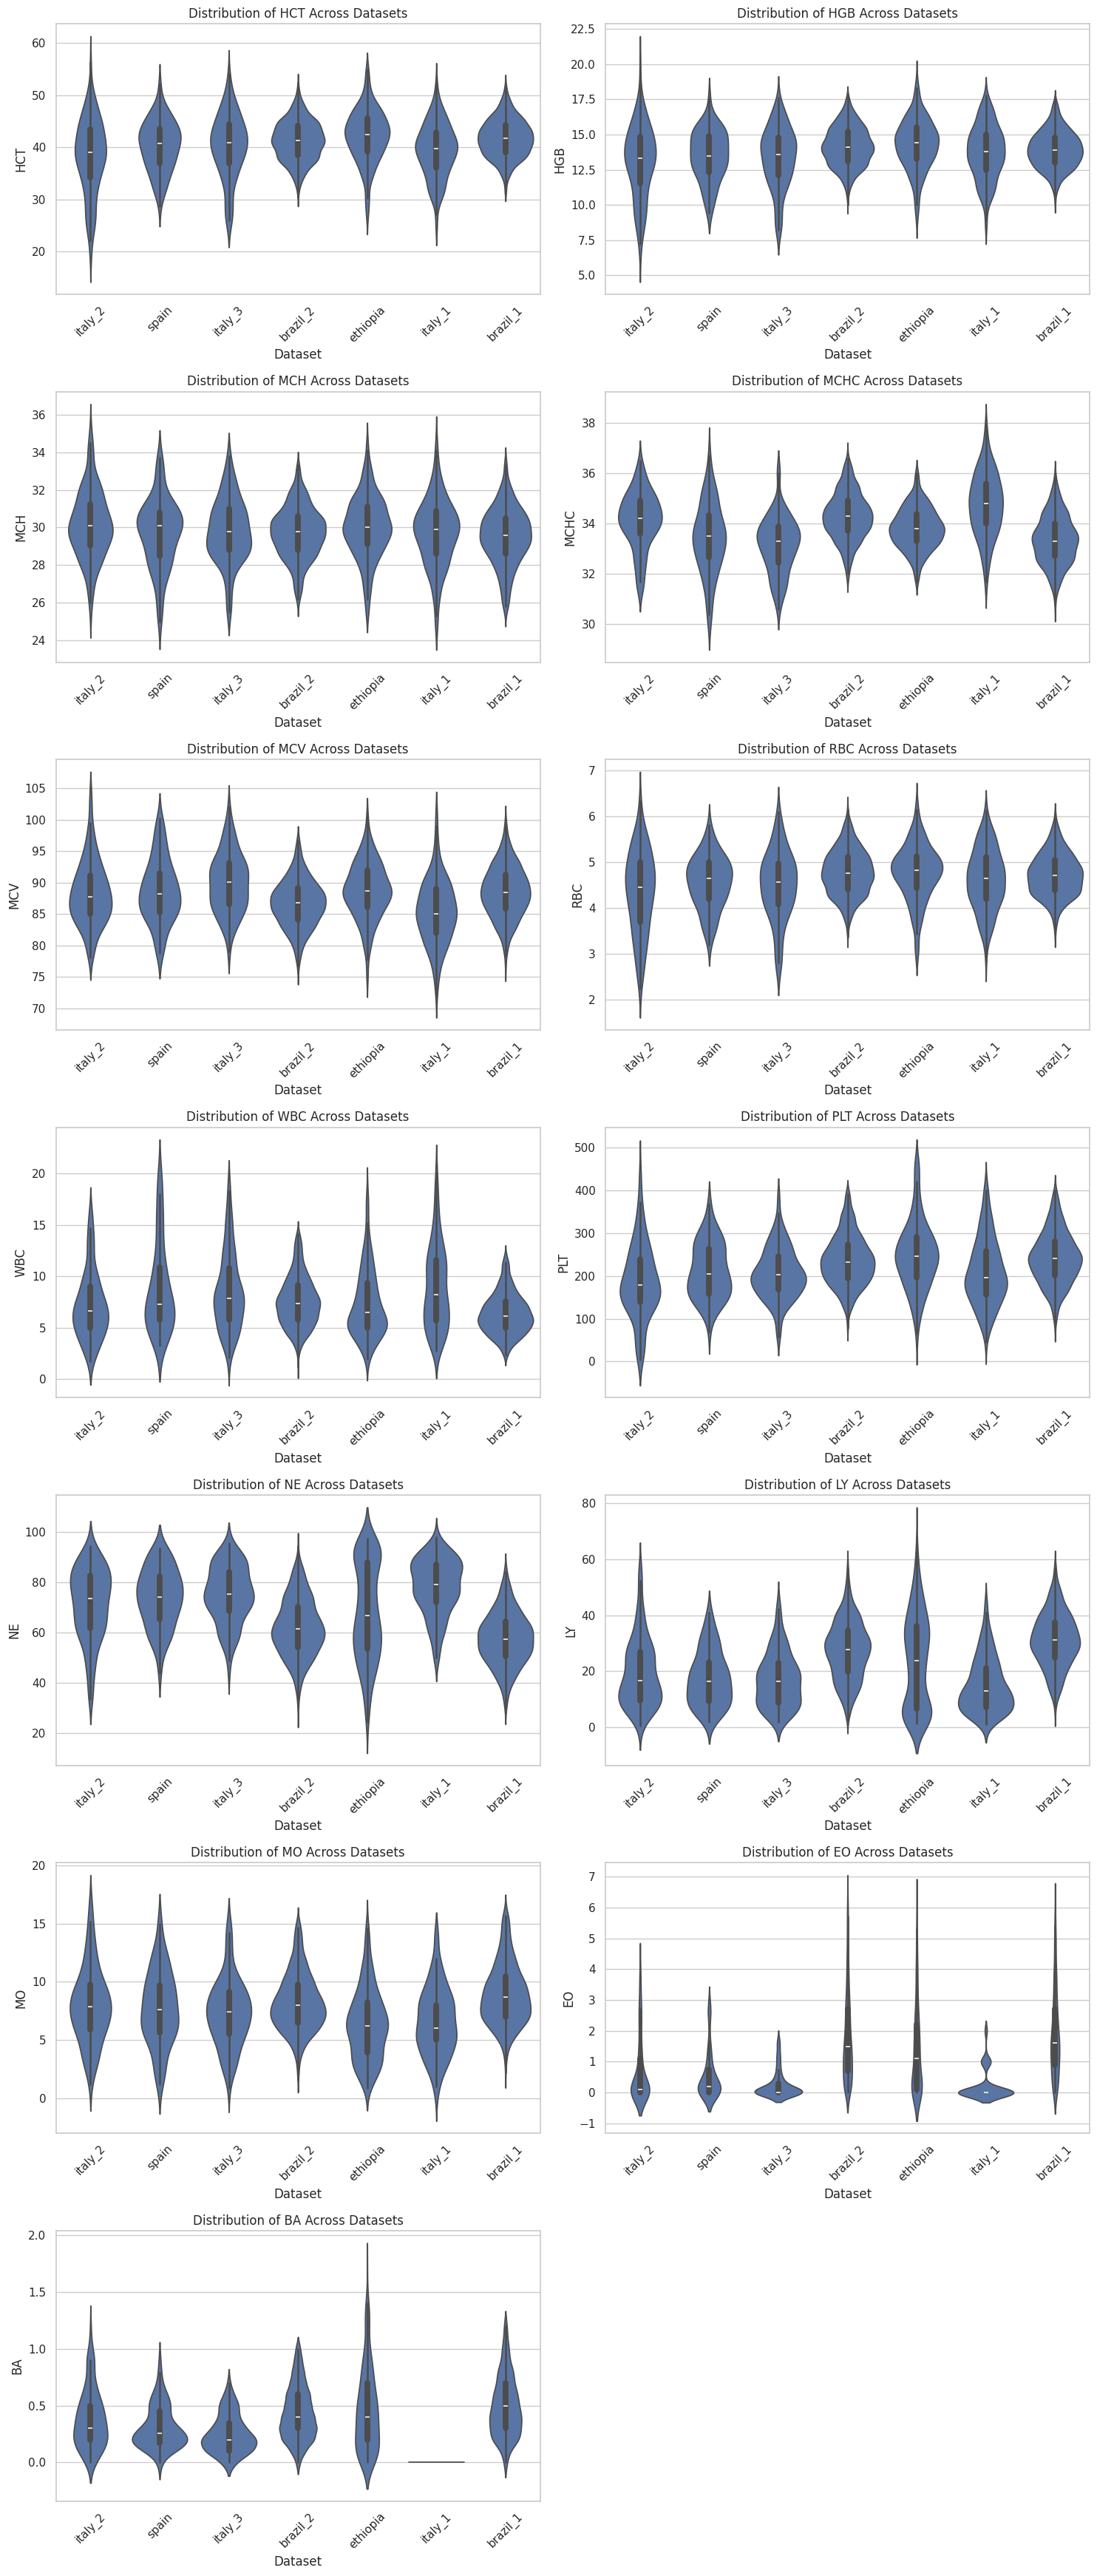

In [11]:
# Create a list to store all dataframes with dataset name
all_dfs = []
for dataset_name, df in data.items():
    df['dataset'] = dataset_name  # Add dataset name as a column
    all_dfs.append(df)

# Combine all dataframes
combined_df = pd.concat(all_dfs, ignore_index=True)

# Get numerical columns (excluding 'target' and 'dataset')
numerical_cols = combined_df.select_dtypes(include=['float64', 'int64']).columns
numerical_cols = [col for col in numerical_cols if col not in ['target', 'dataset']]

# Create violin plots for each numerical feature
n_cols = 2  # Number of columns in the subplot grid
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols  # Calculate required number of rows

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
axes = axes.flatten()  # Flatten axes array for easier iteration

for idx, feature in enumerate(numerical_cols):
    sns.violinplot(data=combined_df, x='dataset', y=feature, ax=axes[idx])
    axes[idx].set_title(f'Distribution of {feature} Across Datasets')
    axes[idx].set_xlabel('Dataset')
    axes[idx].set_ylabel(feature)
    axes[idx].tick_params(axis='x', rotation=45)

# Hide empty subplots if any
for idx in range(len(numerical_cols), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()

In [12]:
from scipy.stats import kruskal

for column_name in data["brazil_1"].columns:
    # Extract the specified column from each dataframe
    samples = [df[column_name].values for df in data.values()]
    
    # Perform Kruskal-Wallis H-test
    statistic, p_value = kruskal(*samples)
    
    print(f"Column: {column_name}, p-value: {p_value}, statistic: {statistic}")

Column: HCT, p-value: 9.73633908846722e-18, statistic: 92.37234004156491
Column: HGB, p-value: 2.2605881454777177e-14, statistic: 76.11635799659973
Column: MCH, p-value: 1.6790075706052264e-05, statistic: 31.935322601603207
Column: MCHC, p-value: 4.250803118569653e-146, statistic: 691.4685886169858
Column: MCV, p-value: 8.026789254573709e-50, statistic: 243.9547800405065
Column: RBC, p-value: 1.1382412957728134e-13, statistic: 72.70498066401899
Column: WBC, p-value: 1.8906935214895068e-44, statistic: 218.78361420520343
Column: PLT, p-value: 2.016494723956235e-34, statistic: 171.64244008133878
Column: NE, p-value: 3.317624871369509e-146, statistic: 691.9671811087021
Column: LY, p-value: 1.5985336531536575e-126, statistic: 600.7604885579921
Column: MO, p-value: 8.691509195985459e-55, statistic: 267.18245200031083
Column: EO, p-value: 7.49911535690472e-187, statistic: 880.107638204679
Column: BA, p-value: 2.898413203373443e-159, statistic: 752.4387601471742
Column: target, p-value: 2.3560

In [13]:
names, dataframes = zip(*data.items())
names

('italy_2', 'spain', 'italy_3', 'brazil_2', 'ethiopia', 'italy_1', 'brazil_1')

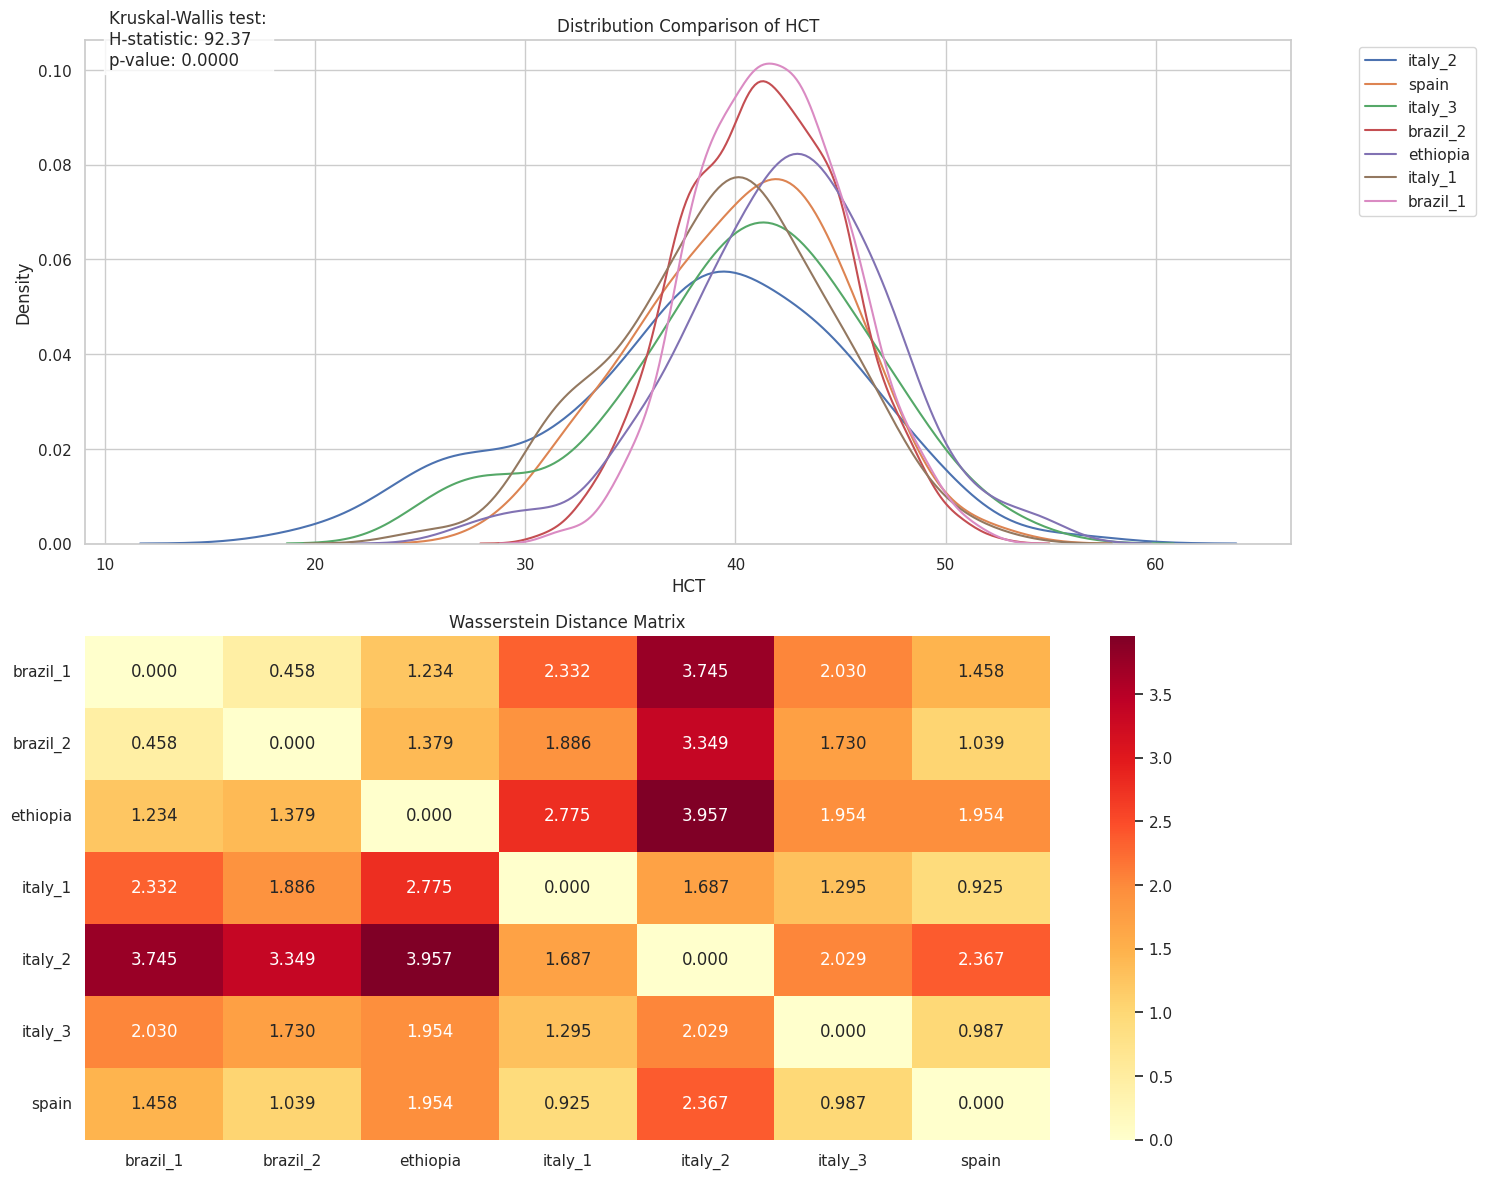

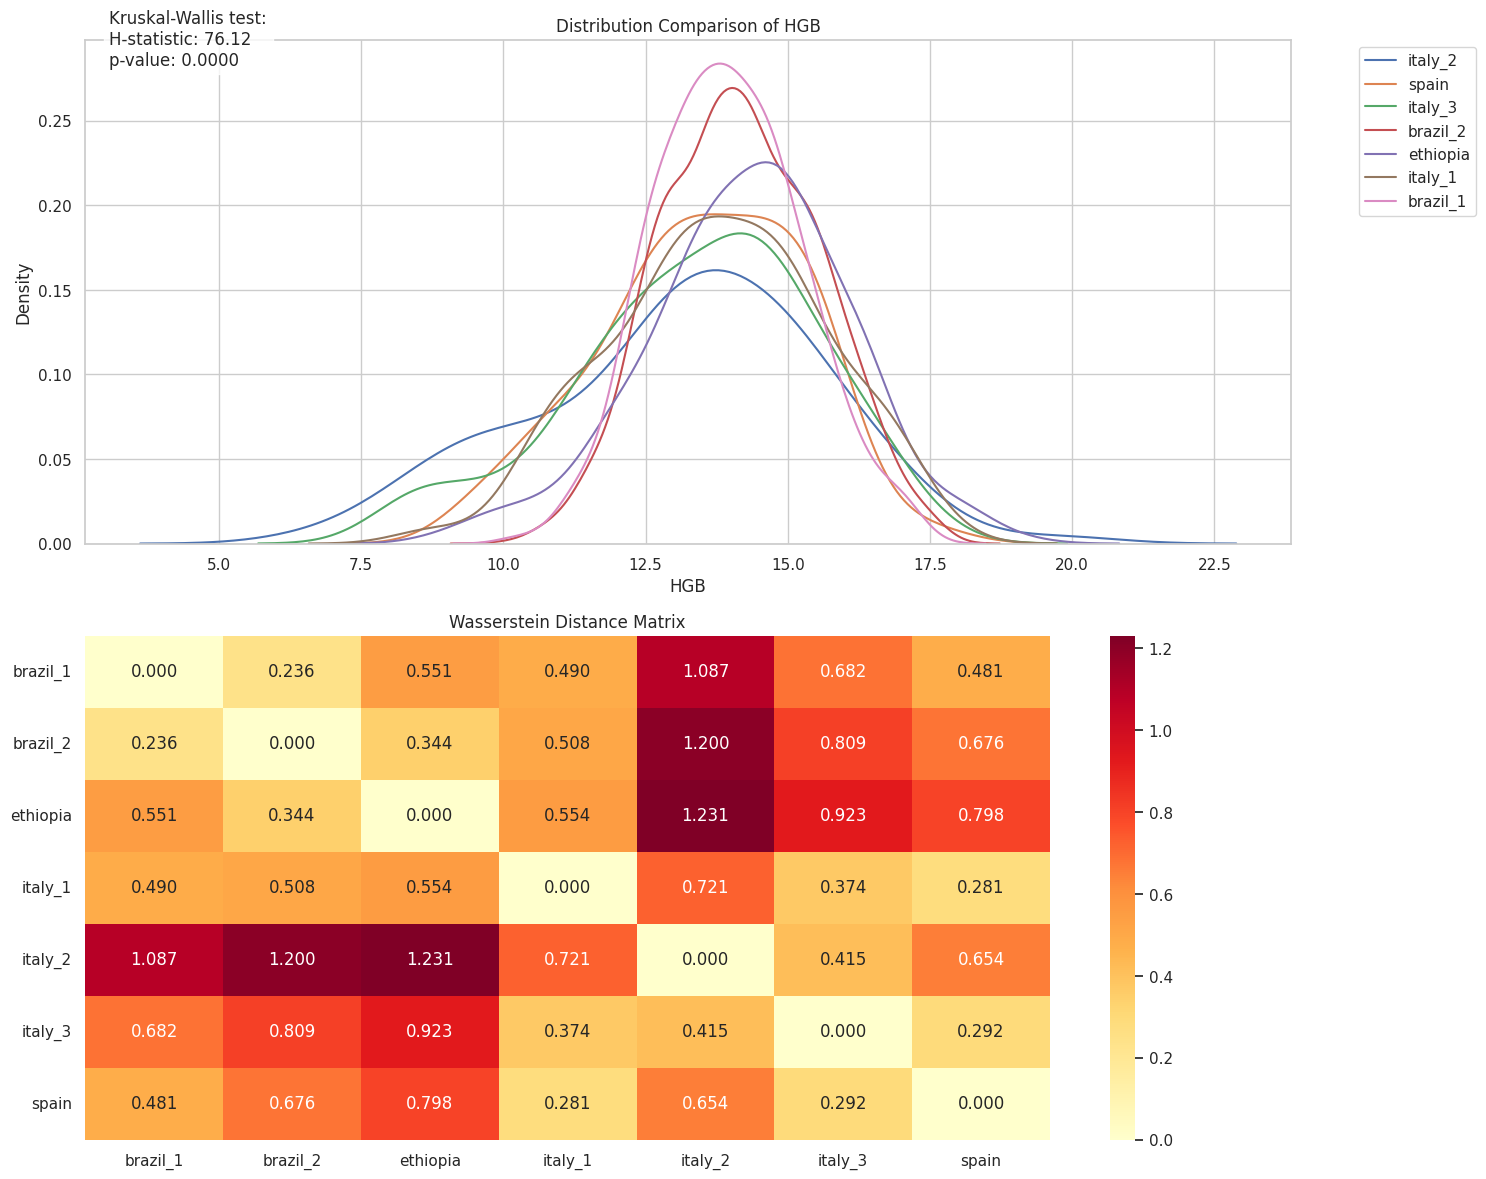

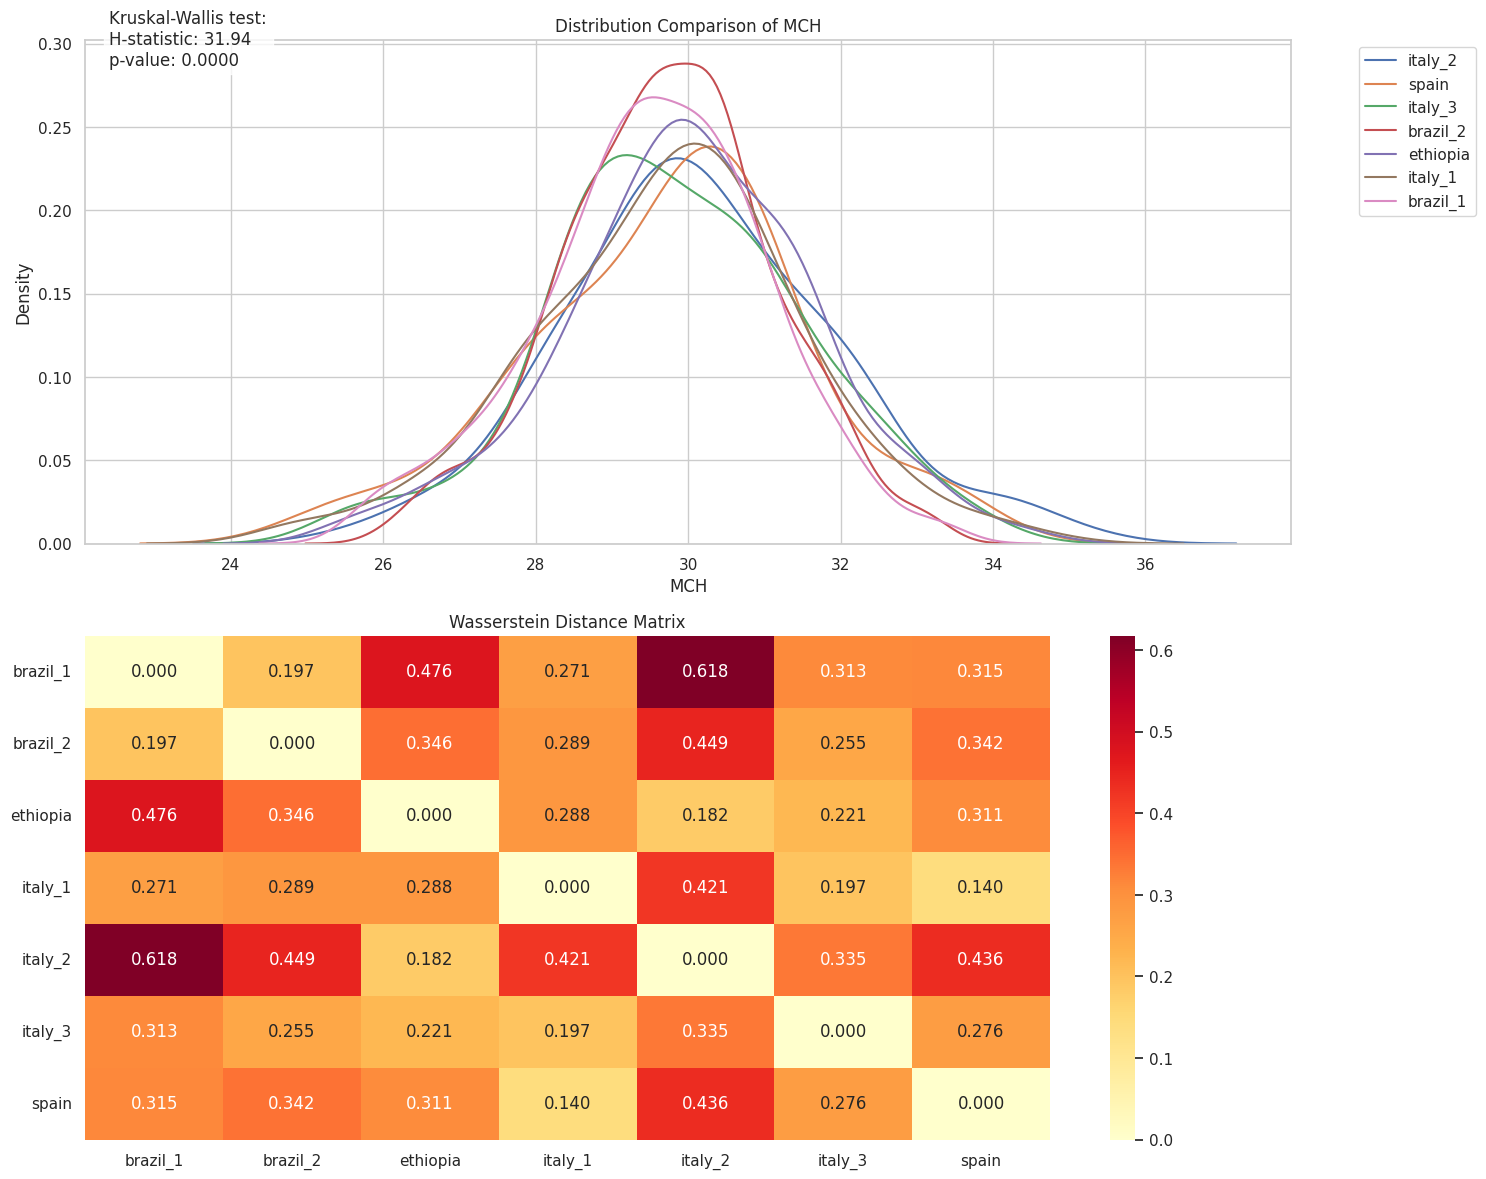

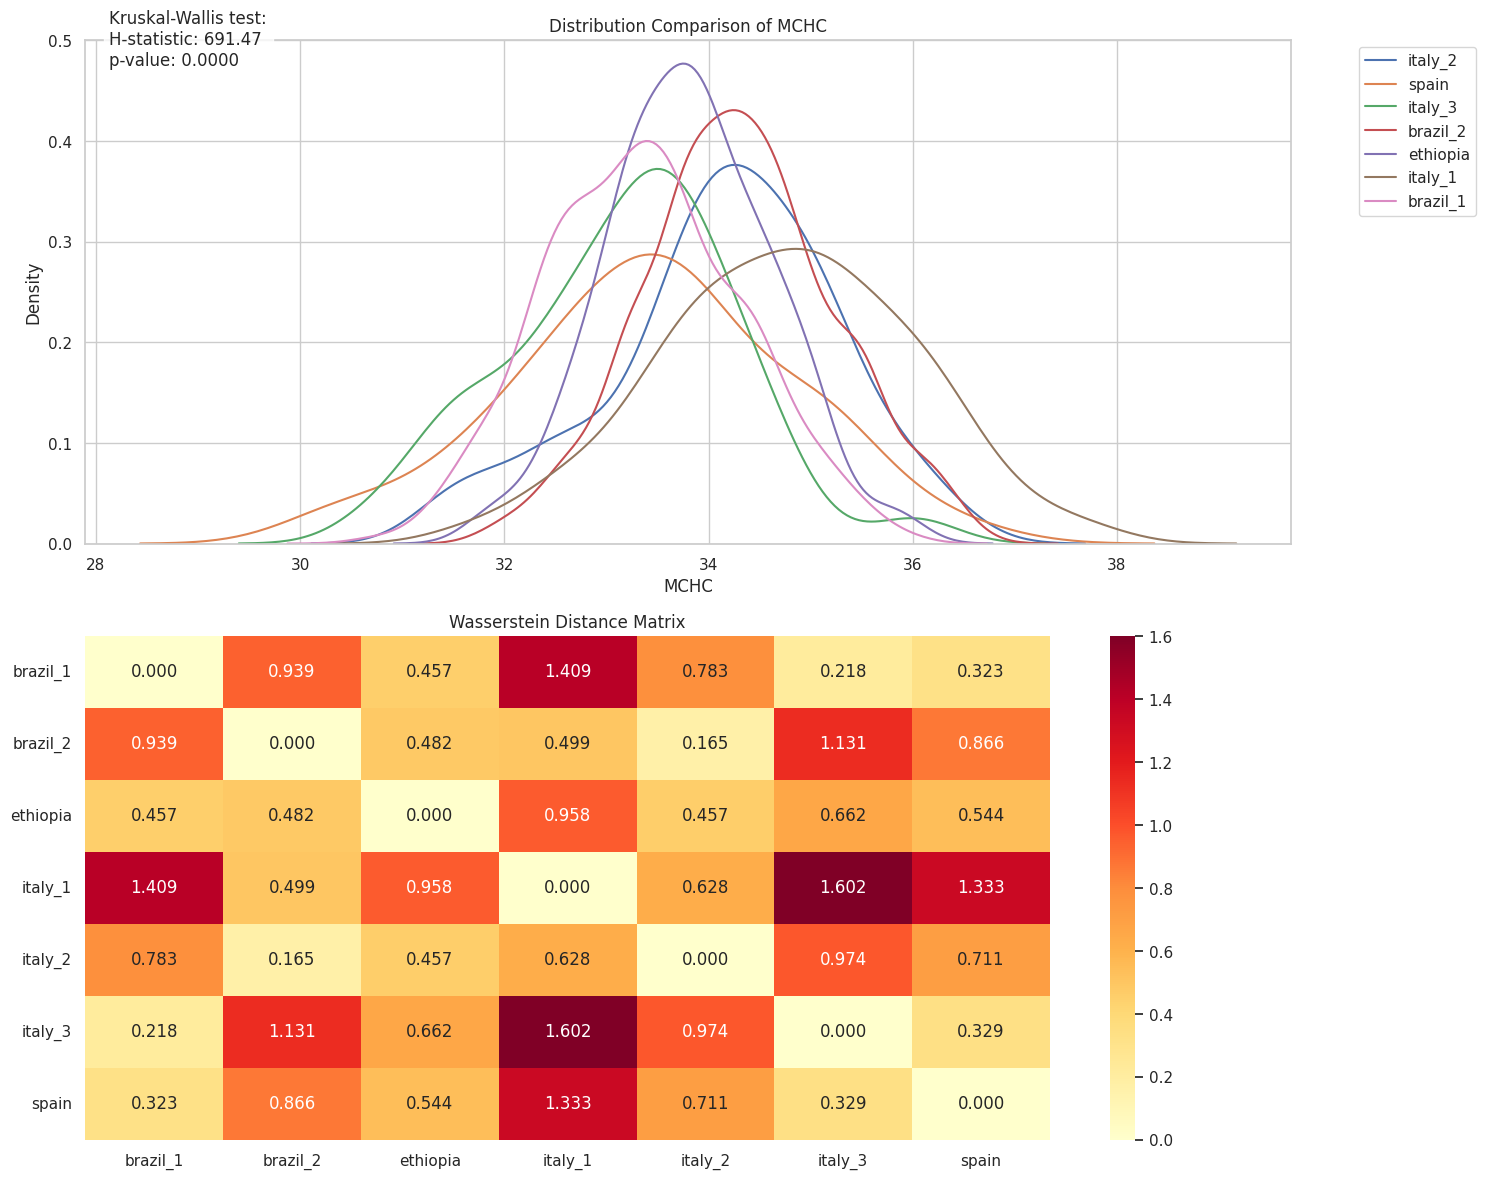

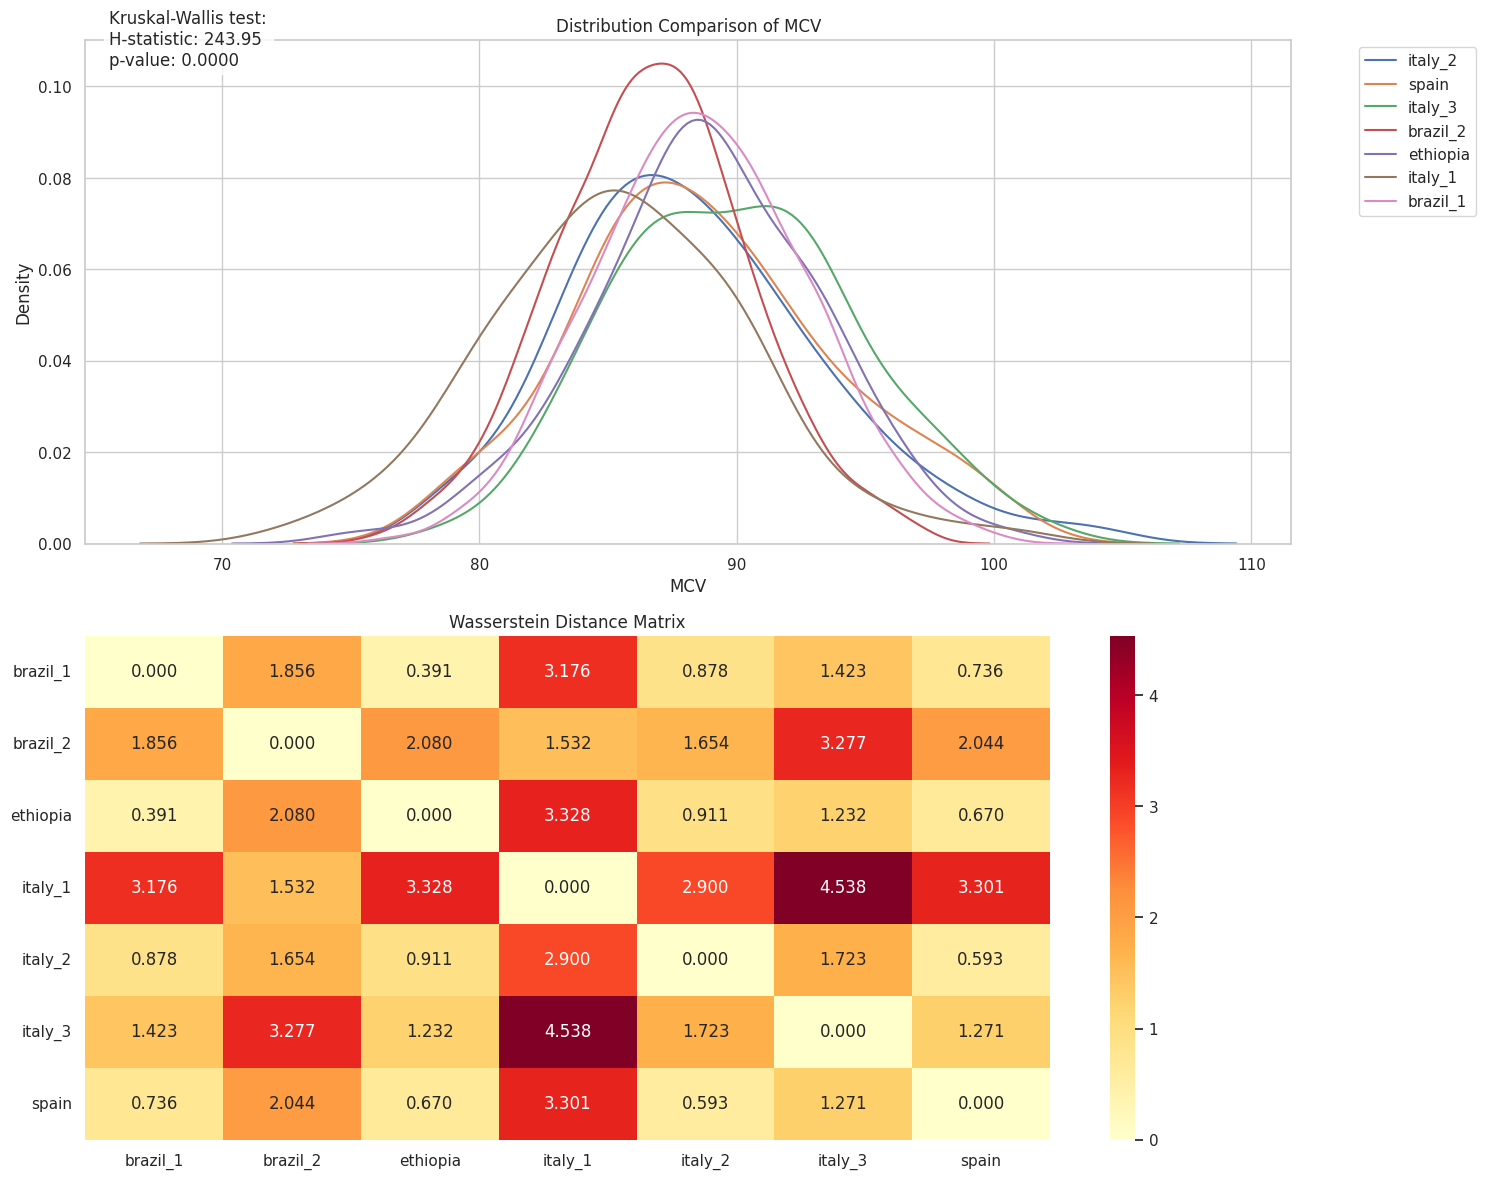

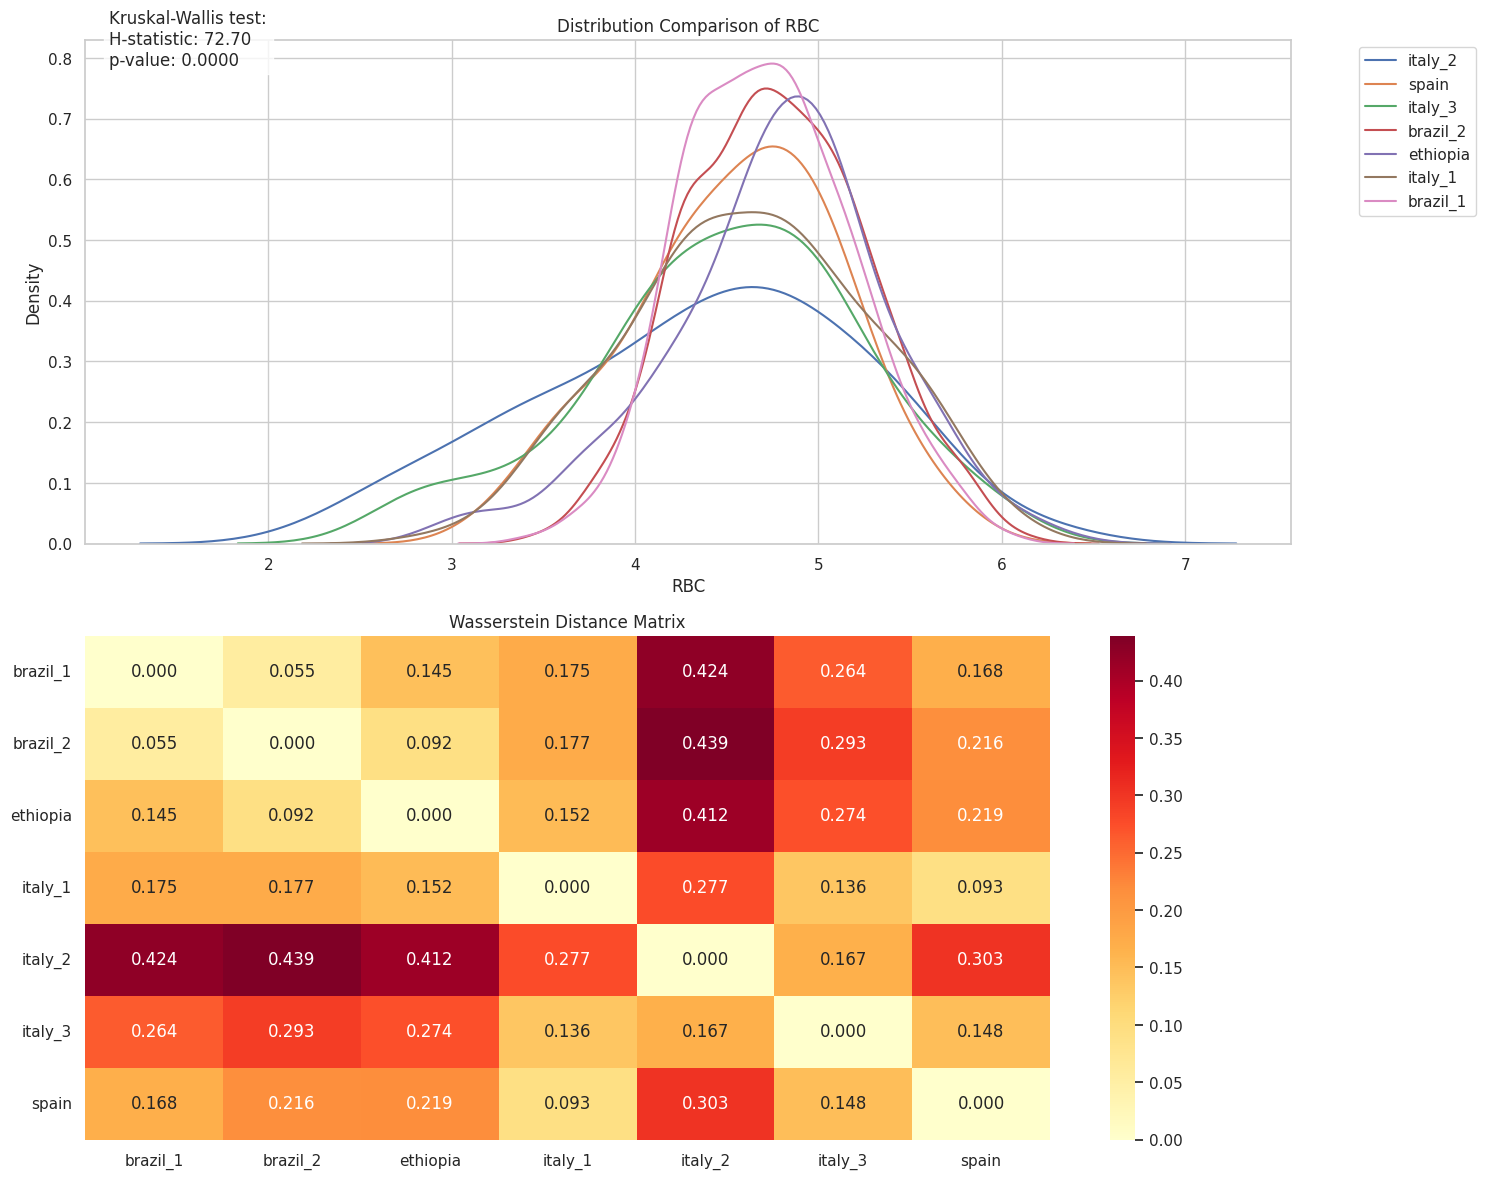

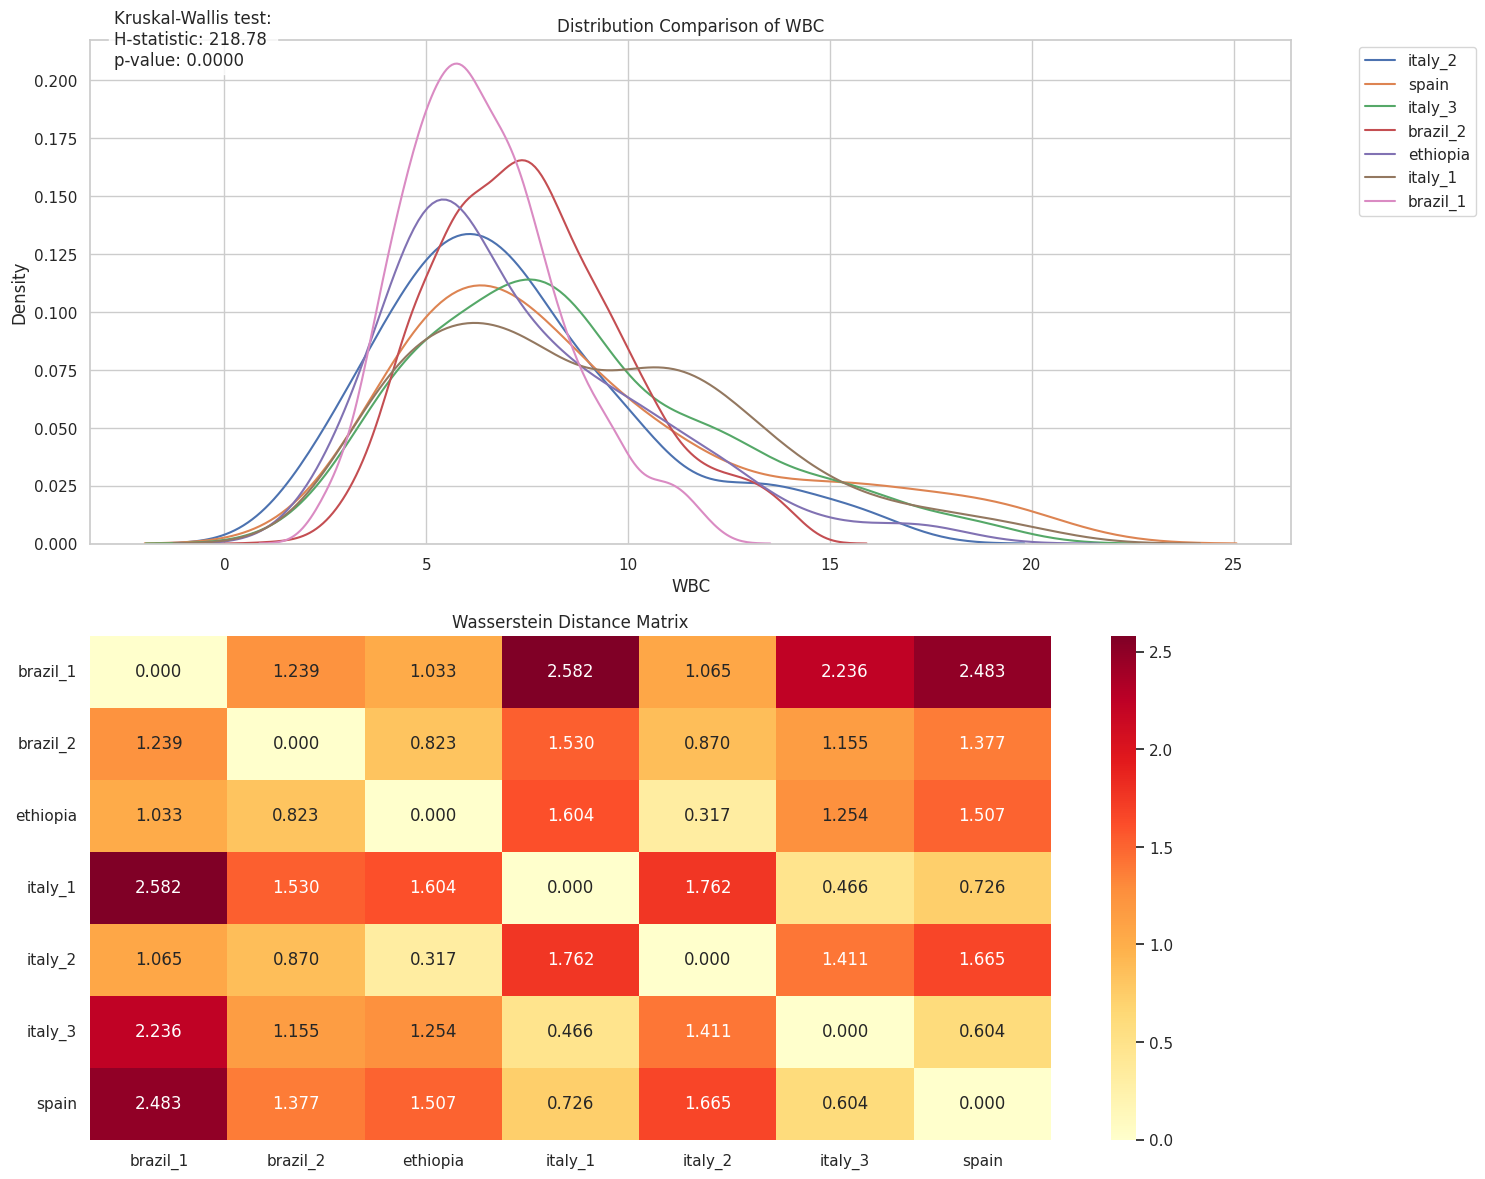

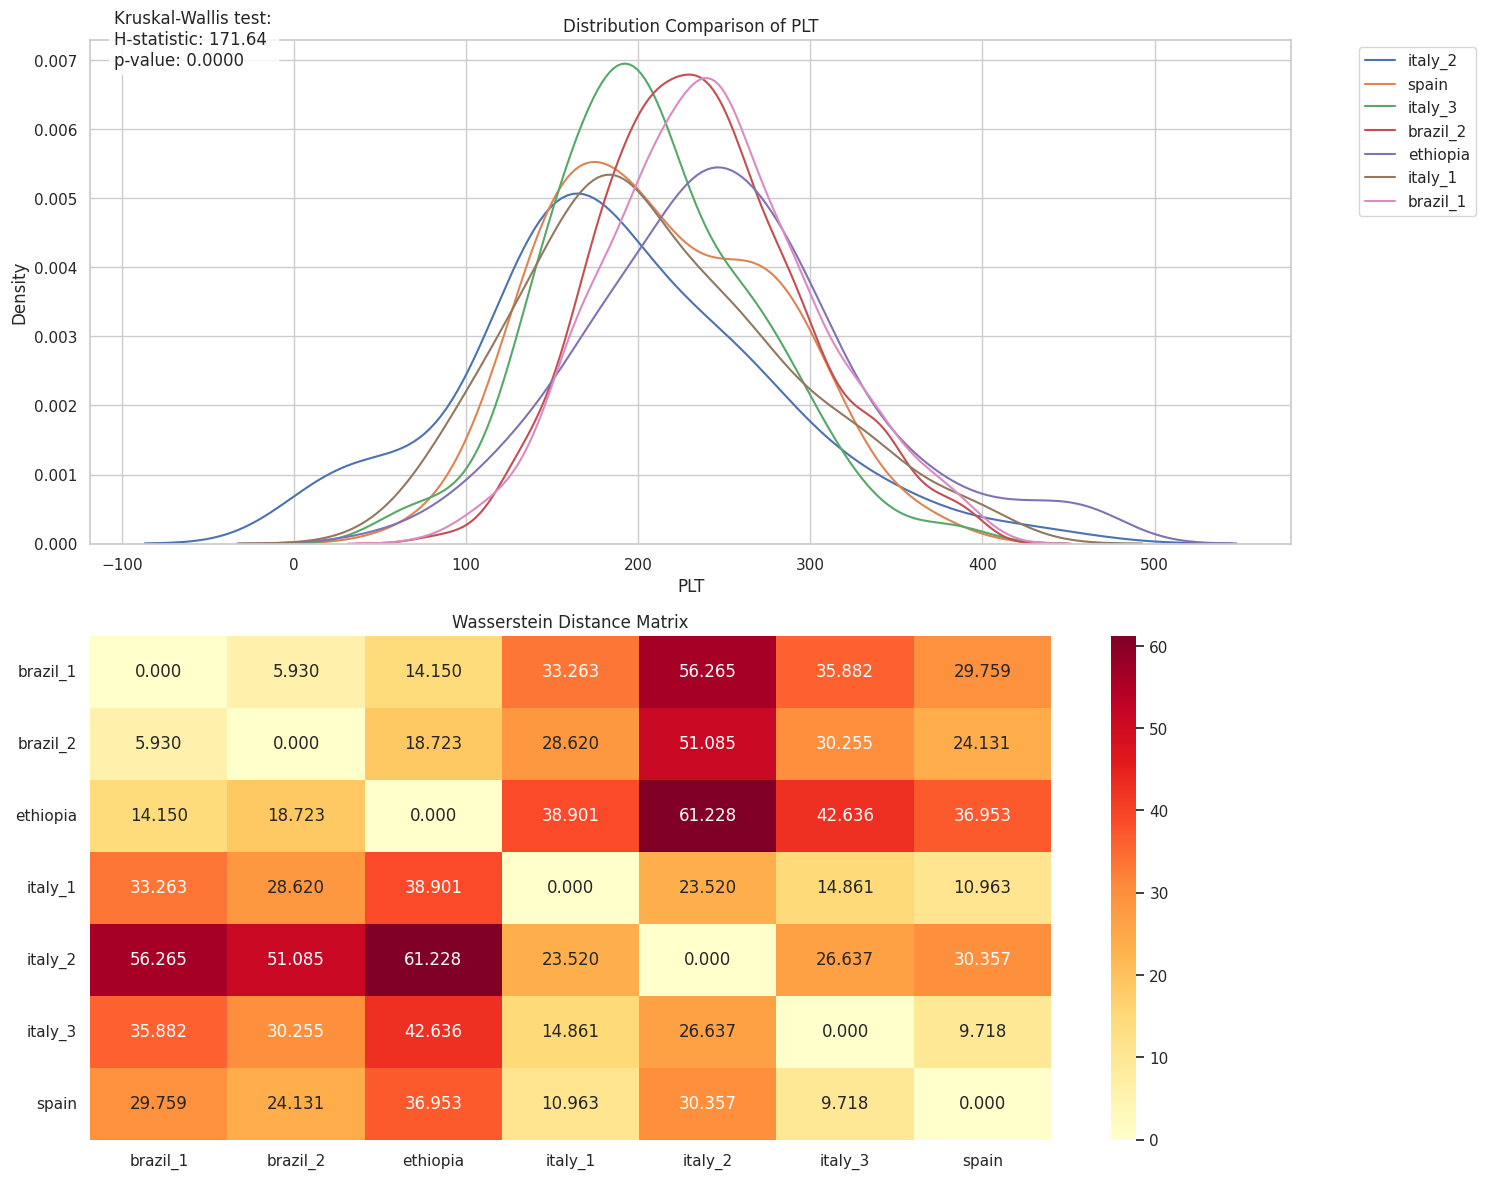

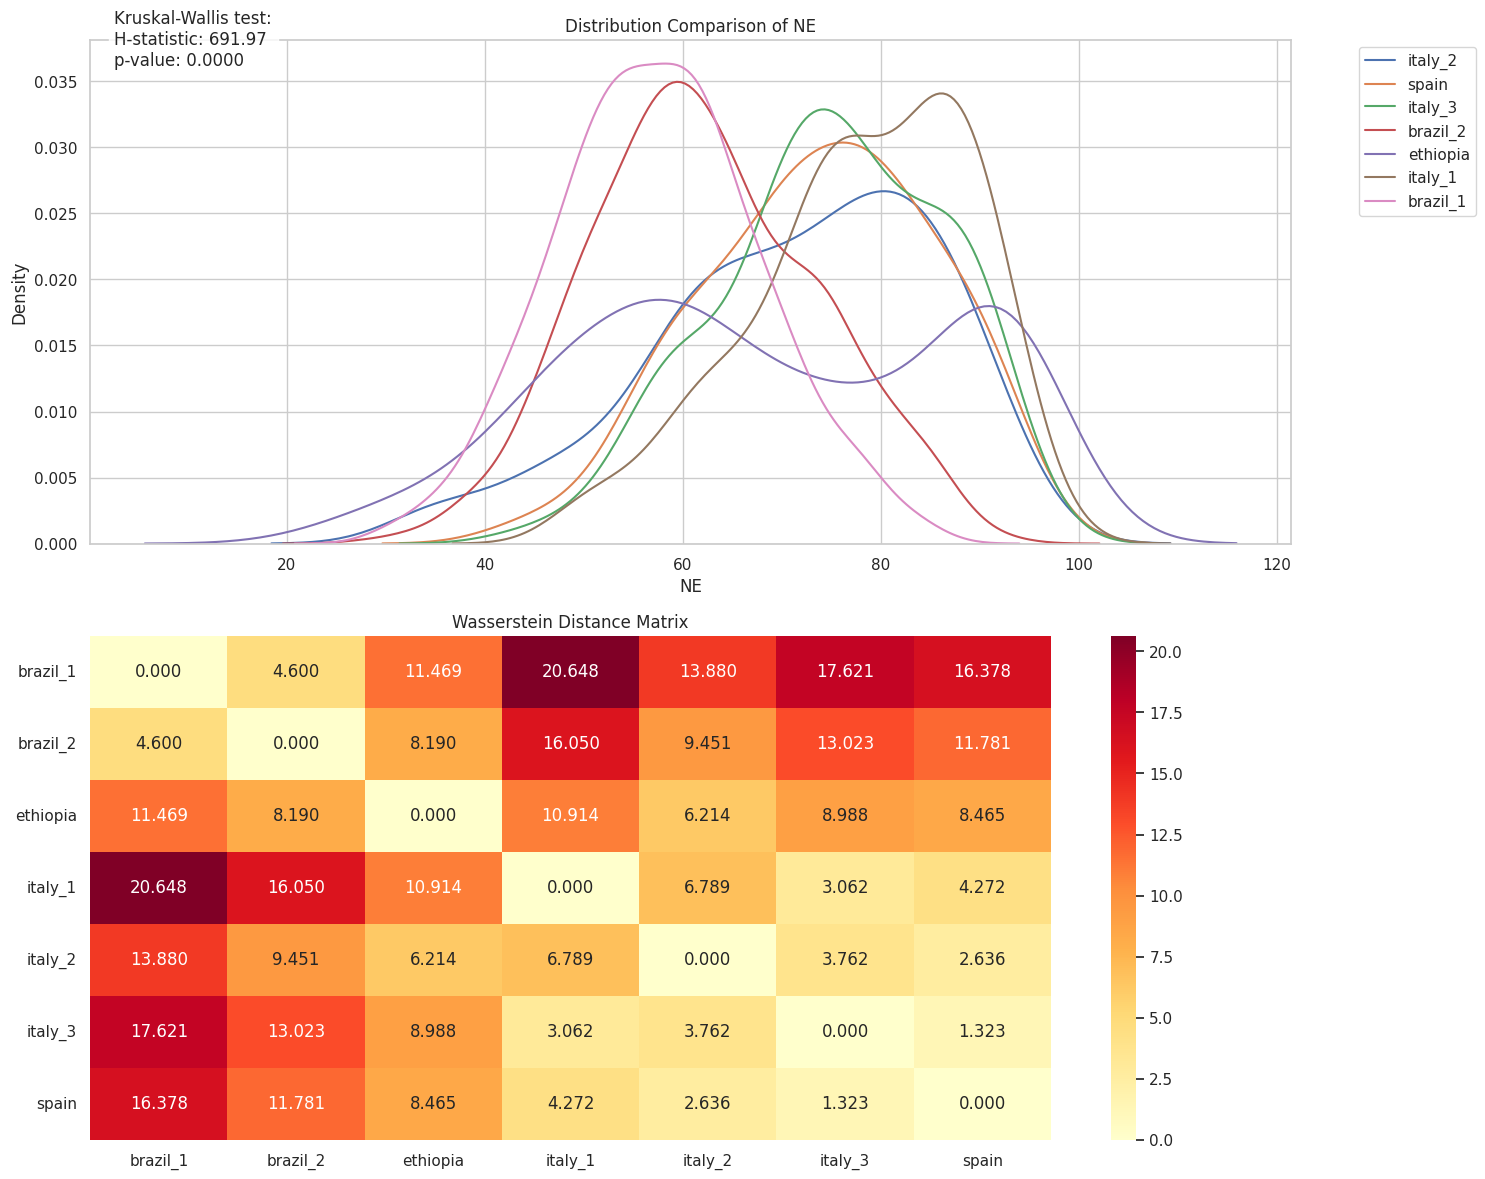

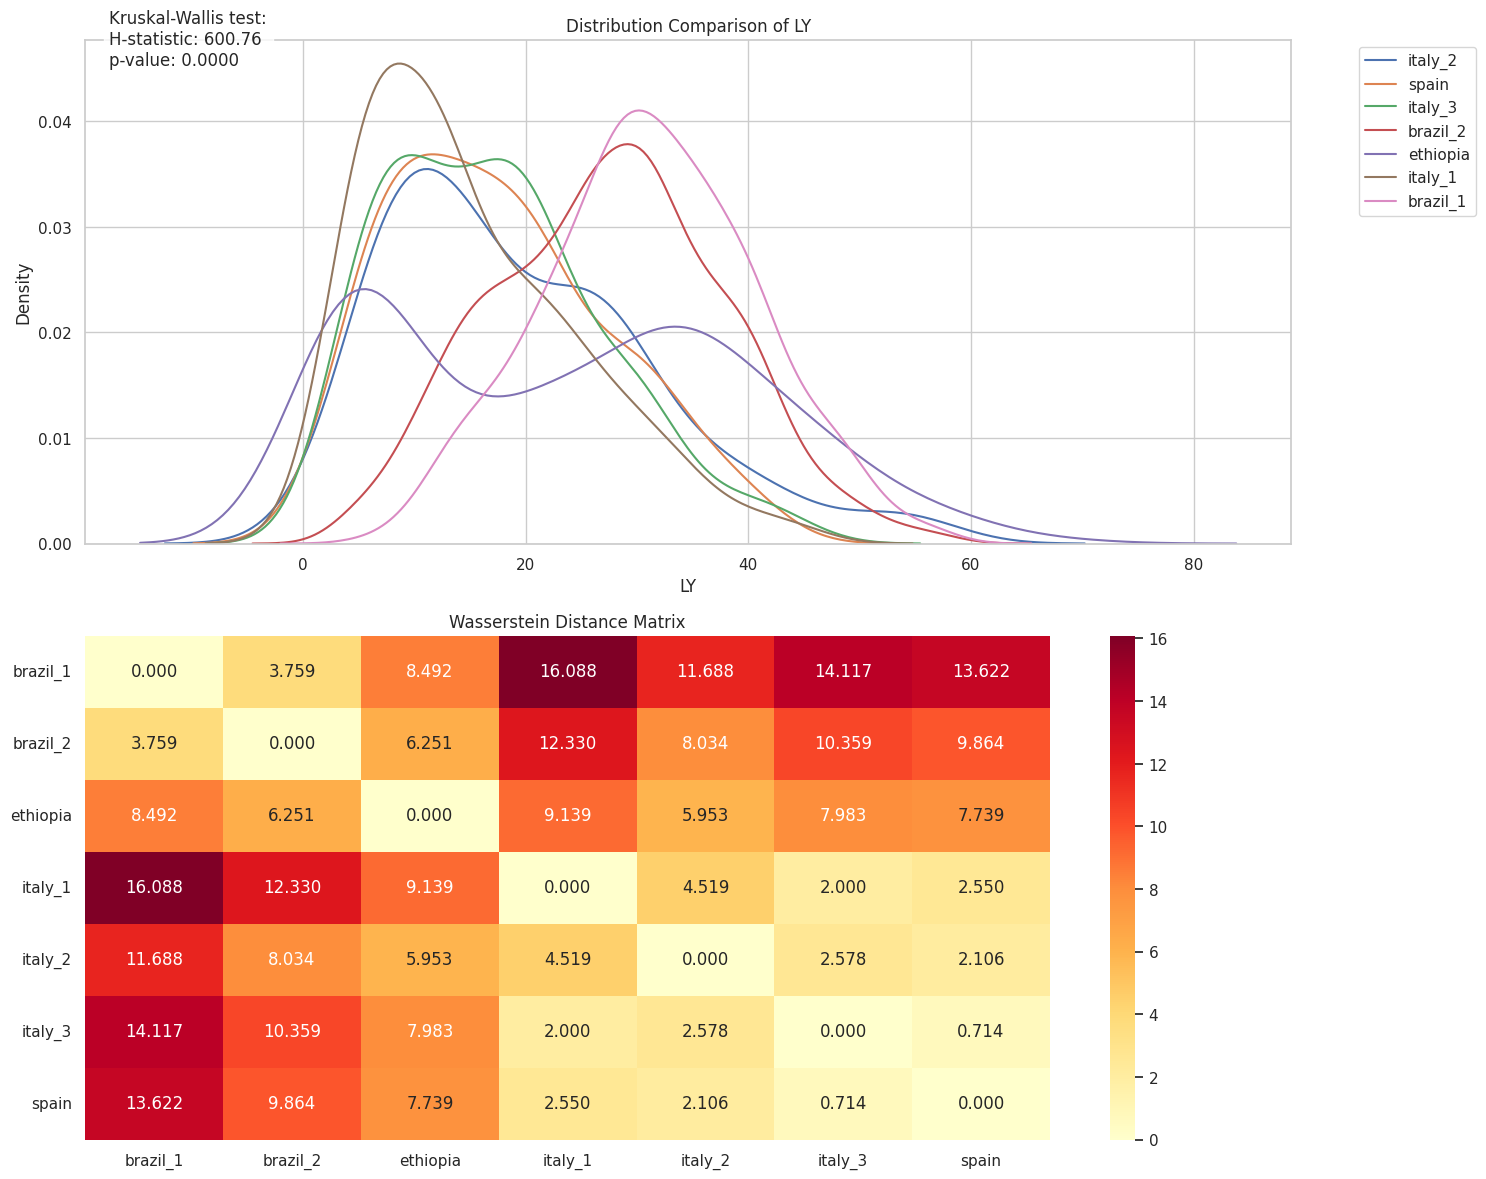

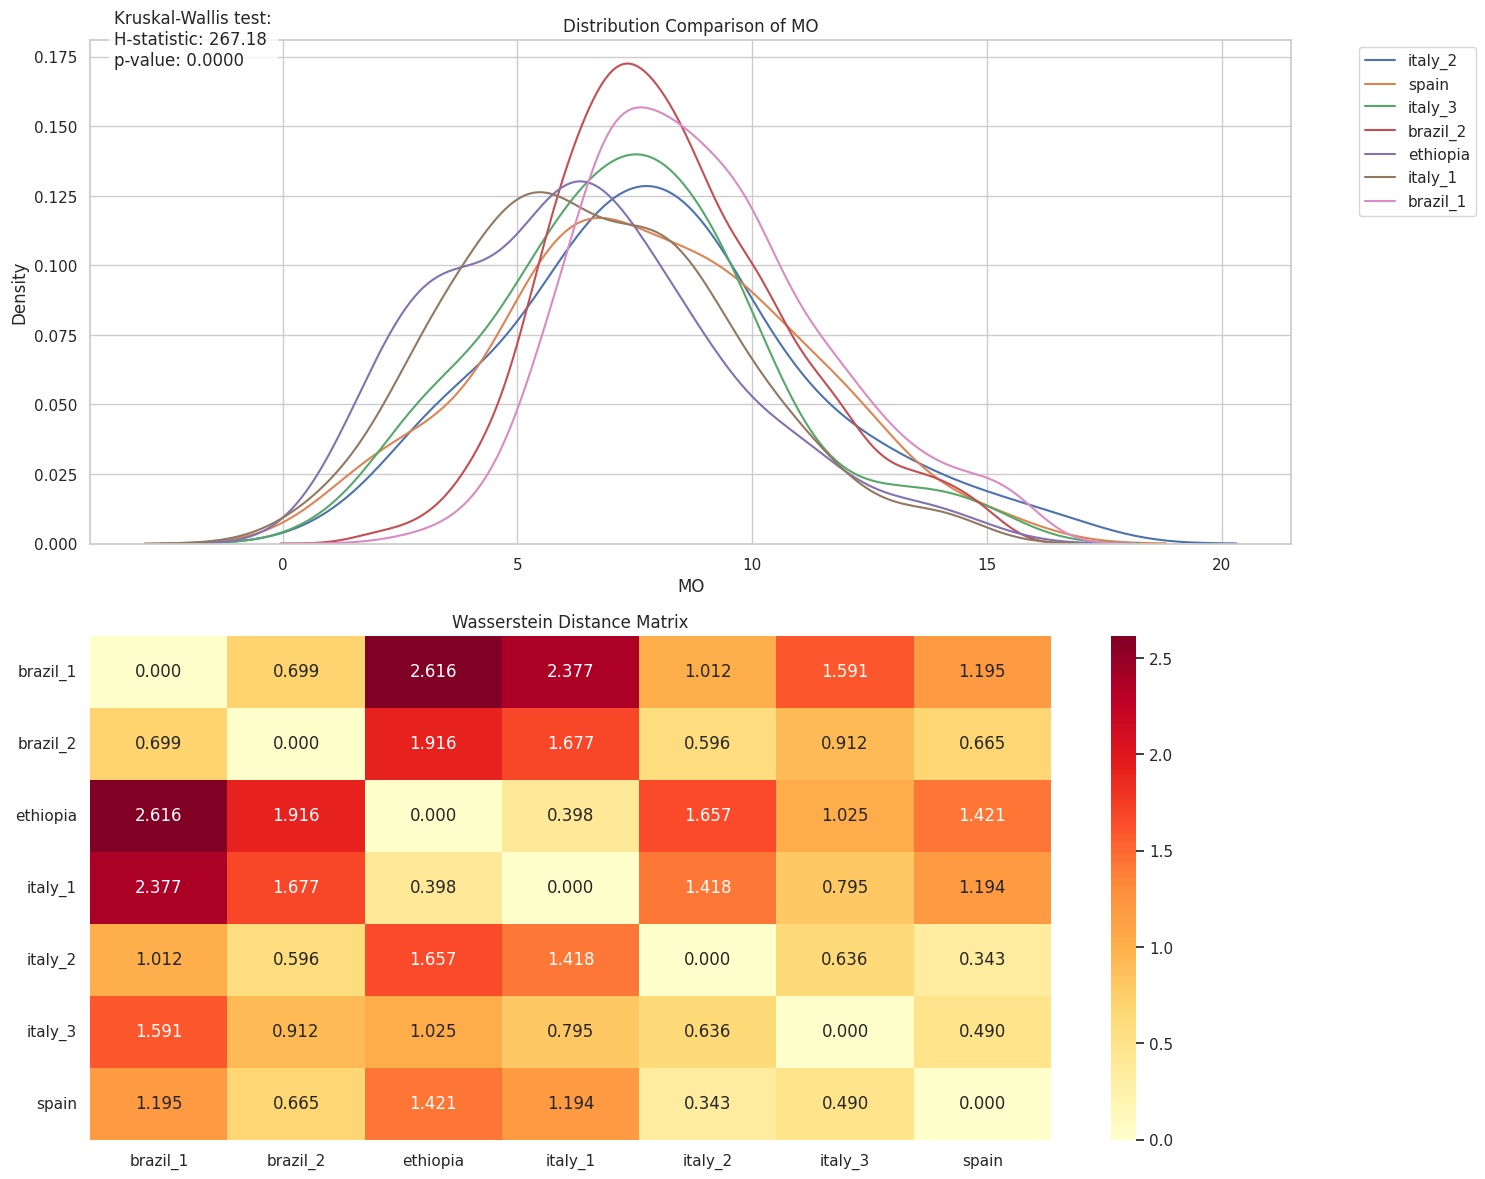

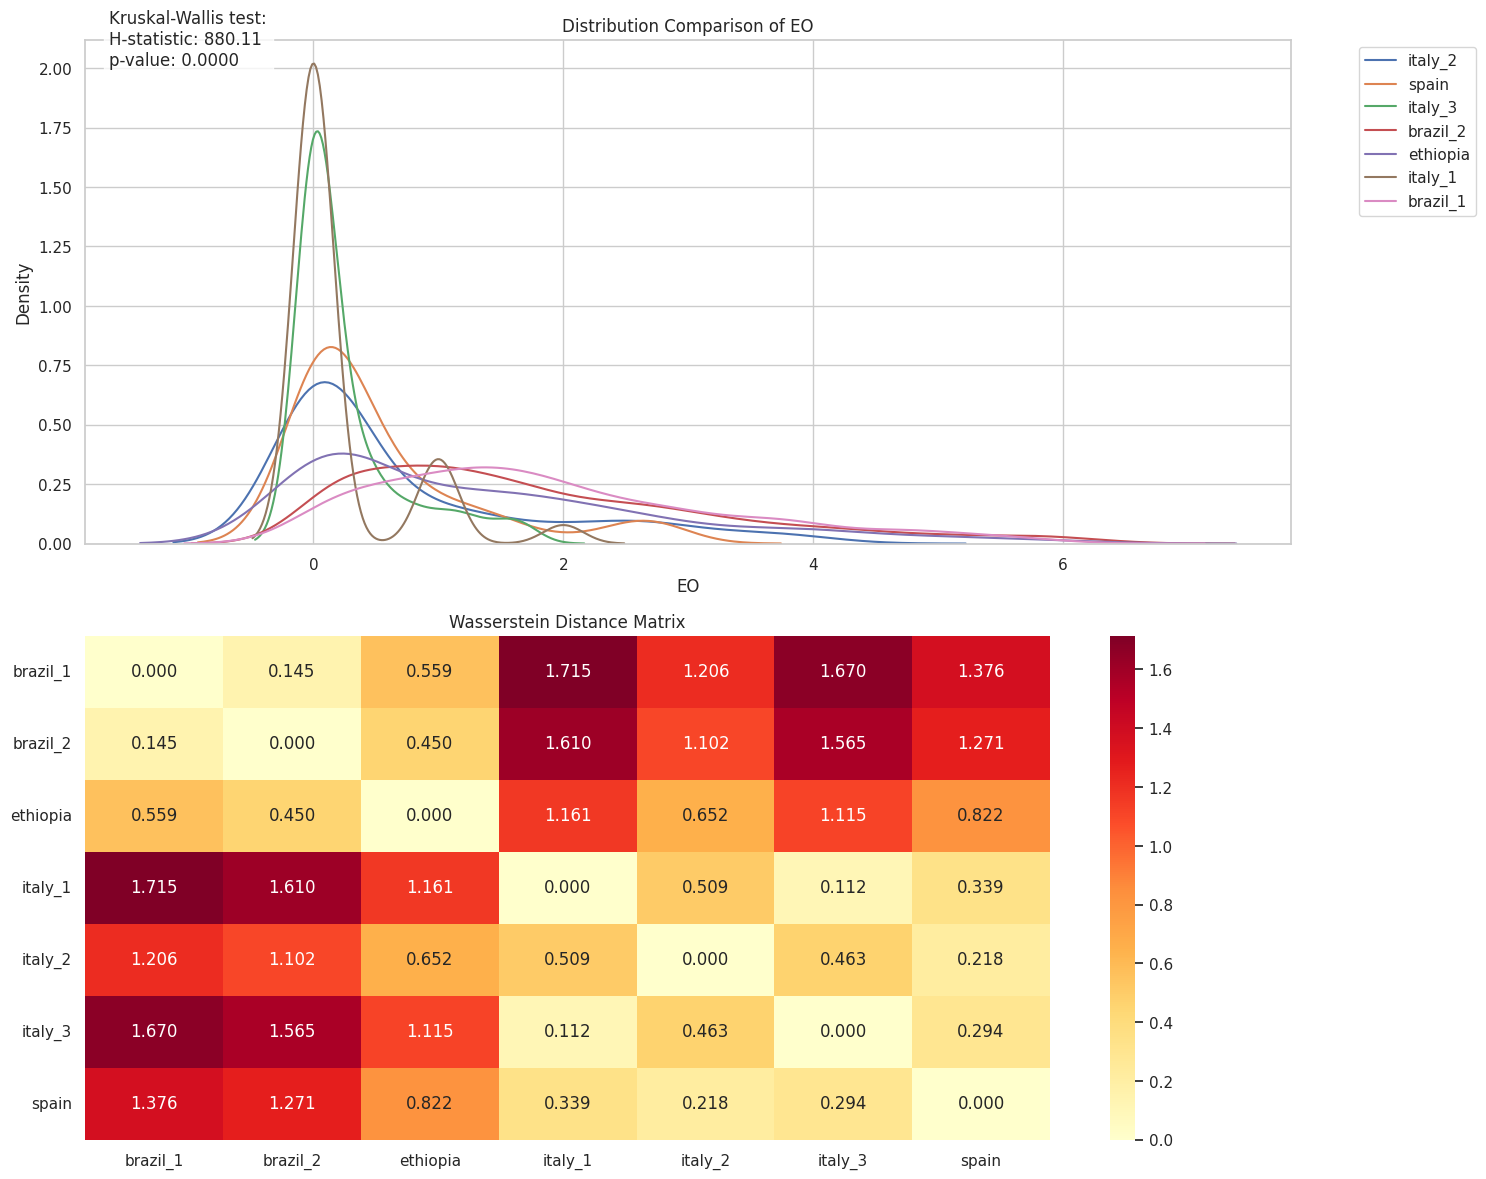

/tmp/ipykernel_83423/1607210367.py:21: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df[column_name], label=name)


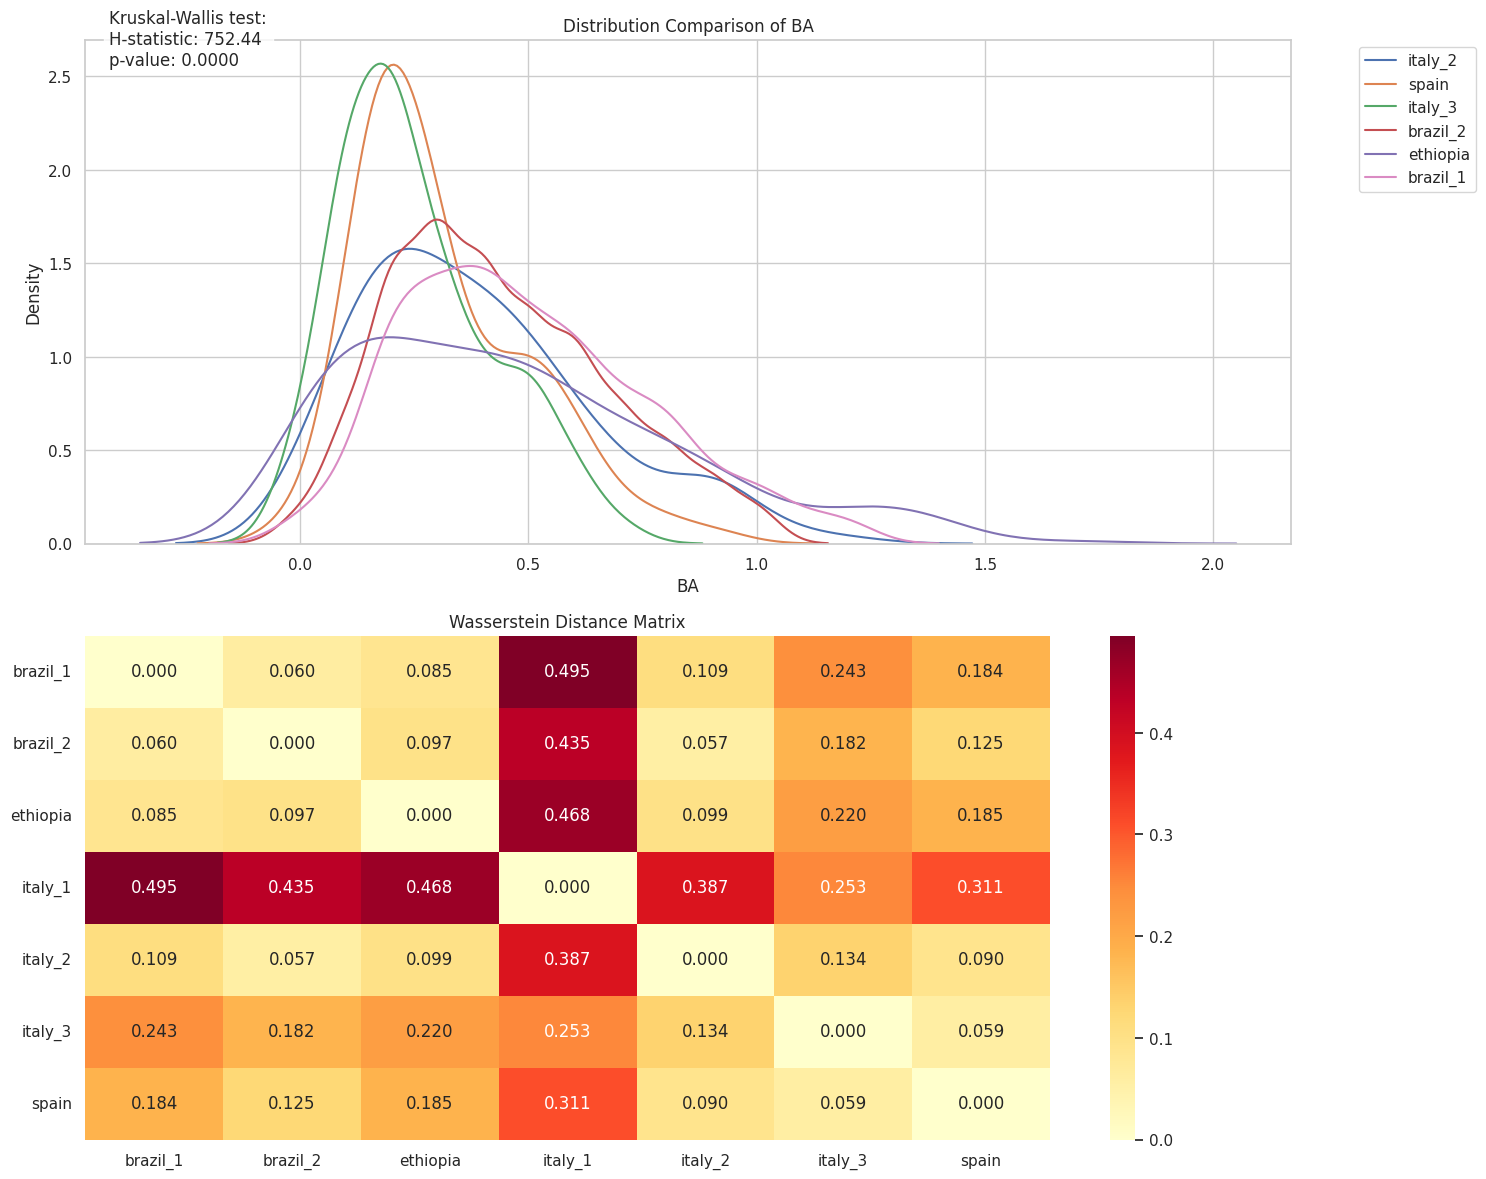

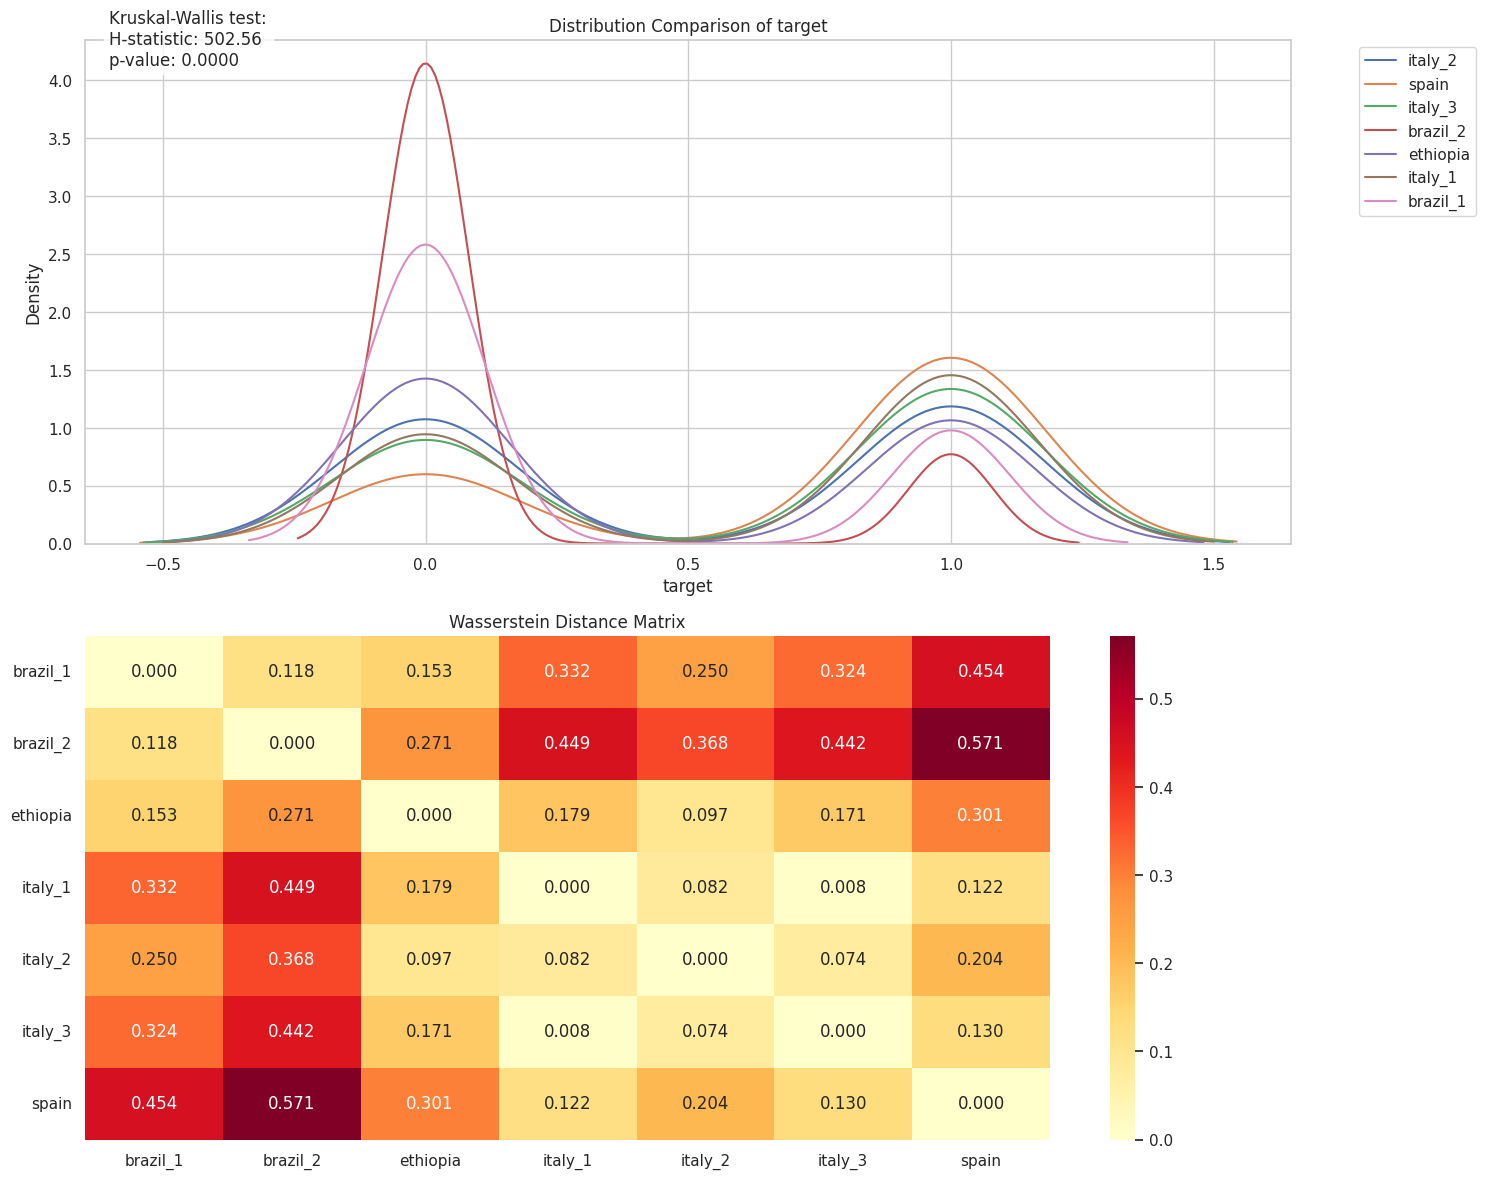

In [14]:
from scipy.stats import wasserstein_distance

def plot_distribution_comparison(data, column_name):
    """
    Create visualizations comparing distributions across dataframes.
    
    Args:
        data: Dictionary of dataframes where keys are dataset names
        column_name: Name of the column to compare across dataframes
    """
    # Get dataframes and names from dictionary
    df_names = sorted(list(data.keys()))
    dataframes = [data[name] for name in df_names]
    
    # Create figure with two subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))
    
    # 1. Distribution Plot
    plt.subplot(2, 1, 1)
    for name, df in data.items():
        sns.kdeplot(data=df[column_name], label=name)
    
    plt.title(f'Distribution Comparison of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Density')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Calculate and add Kruskal-Wallis test results
    samples = [df[column_name].values for df in dataframes]
    statistic, p_value = kruskal(*samples)
    plt.text(0.02, 0.95, f'Kruskal-Wallis test:\nH-statistic: {statistic:.2f}\np-value: {p_value:.4f}',
             transform=ax1.transAxes, bbox=dict(facecolor='white', alpha=0.8))
    
    # 2. Wasserstein Distance Heatmap
    n = len(dataframes)
    distance_matrix = np.zeros((n, n))
    
    for i, name1 in enumerate(df_names):
        for j, name2 in enumerate(df_names):
            distance_matrix[i, j] = wasserstein_distance(
                data[name1][column_name].values,
                data[name2][column_name].values
            )
    
    plt.subplot(2, 1, 2)
    sns.heatmap(distance_matrix, 
                annot=True, 
                fmt='.3f', 
                cmap='YlOrRd',
                xticklabels=df_names,
                yticklabels=df_names)
    plt.title('Wasserstein Distance Matrix')
    
    plt.tight_layout()
    plt.show()
    
    return distance_matrix


for column_name in data["brazil_1"].columns:
    if column_name == "dataset":
        continue
    distances = plot_distribution_comparison(data, column_name=column_name)


In [15]:
data

{'italy_2':       HCT   HGB   MCH  MCHC   MCV   RBC    WBC  PLT    NE    LY   MO   EO  \
 0    36.0  12.3  31.1  34.2  91.1  3.95  11.88  350  76.0  15.1  7.3  1.1   
 1    33.9  10.6  29.2  31.3  93.4  3.63  16.34  126  83.9   7.5  8.4  0.1   
 2    39.8  13.2  31.4  33.2  94.5  4.21   6.36  179  79.0   9.0  9.3  2.4   
 3    37.4  12.6  30.7  33.7  91.2  4.10   4.86  238  65.5  26.1  6.6  1.2   
 4    26.4   9.1  28.8  34.5  83.5  3.16   2.30    9  42.1  51.3  5.7  0.0   
 ..    ...   ...   ...   ...   ...   ...    ...  ...   ...   ...  ...  ...   
 178  43.4  14.8  30.8  34.1  90.4  4.80  12.96  167  82.0  10.9  6.9  0.0   
 179  24.0   8.3  29.5  34.6  85.4  2.81  14.70  259  77.5  12.0  9.9  0.3   
 180  45.8  15.5  29.4  33.8  86.9  5.27   8.44  260  84.7   7.6  7.1  0.0   
 181  29.9   9.5  26.6  31.8  83.8  3.57   8.98  152  80.1  11.4  7.7  0.6   
 182  37.6  13.5  33.5  35.9  93.3  4.03   3.40  145  79.7  14.4  5.9  0.0   
 
       BA  target  dataset  
 0    0.5       0  ita